<a href="https://colab.research.google.com/github/ggurusaran/Dogs-vs-cats/blob/main/mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/.255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip= True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (100,100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 6947 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/.255,)
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Masks Dataset/Test',
                                                 target_size = (100,100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [ ]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(100,100,3),
    pooling=None,
    classes=1000,
)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
model.trainable = False

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(model)

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation ='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.1))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 27,782,273
Trainable params: 4,194,561
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
cnn.fit(x = training_set, validation_data=test_set, epochs =50)

Epoch 1/50
218/218 [==============================] - 48s 207ms/step - loss: 1.7422 - accuracy: 0.5384 - val_loss: 0.6483 - val_accuracy: 0.7200
Epoch 2/50
218/218 [==============================] - 44s 203ms/step - loss: 0.5722 - accuracy: 0.7311 - val_loss: 0.6162 - val_accuracy: 0.7100
Epoch 3/50
218/218 [==============================] - 44s 203ms/step - loss: 0.5362 - accuracy: 0.7531 - val_loss: 0.5322 - val_accuracy: 0.8200
Epoch 4/50
218/218 [==============================] - 44s 202ms/step - loss: 0.4857 - accuracy: 0.7956 - val_loss: 0.5128 - val_accuracy: 0.8100
Epoch 5/50
218/218 [==============================] - 44s 203ms/step - loss: 0.4499 - accuracy: 0.8173 - val_loss: 0.4913 - val_accuracy: 0.8100
Epoch 6/50
218/218 [==============================] - 47s 215ms/step - loss: 0.4464 - accuracy: 0.8147 - val_loss: 0.4799 - val_accuracy: 0.8100
Epoch 7/50
218/218 [==============================] - 44s 203ms/step - loss: 0.4181 - accuracy: 0.8264 - val_loss: 0.4158 - val_ac

In [ ]:
score = cnn.evaluate( test_set, verbose=0)
print("Model loss :" ,score[0])
print("Model accuracy :" ,score[1])

Model loss : 0.35475584864616394
Model accuracy : 0.8500000238418579


In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y_pred = cnn.predict(test_set)
y_pred = y_pred > 0.5
y_pred = np.round(y_pred)
cm = confusion_matrix( test_set.classes, y_pred)
print(cm)
print(accuracy_score(test_set.classes, y_pred))

4/4 [==============================] - 2s 362ms/step
[[20 30]
 [19 31]]
0.51


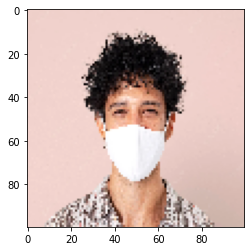

1/1 [==============================] - 1s 783ms/step
mask is there


In [ ]:
import numpy as np
from keras.preprocessing import image
img_path = '/content/drive/MyDrive/latin-man-mockup-psd-wearing-face-mask-new-normal_53876-143275.webp'
img = tf.keras.utils.load_img(img_path, target_size=(100,100))
plt.imshow(img)
plt.show()

test_image = tf.keras.utils.load_img(img_path, target_size = (100,100))
#convert image format into array

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = ' no mask'
else:
  prediction = 'mask is there'

print(prediction)

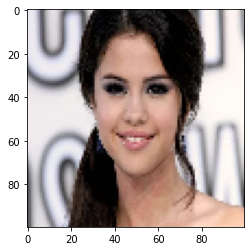

1/1 [==============================] - 0s 20ms/step
no mask


In [ ]:
import numpy as np
from keras.preprocessing import image

img_path = '/content/drive/MyDrive/Selena-Gomez-2010.webp'
img = tf.keras.utils.load_img(img_path, target_size=(100,100))
plt.imshow(img)
plt.show()

test_image = tf.keras.utils.load_img(img_path, target_size = (100,100))
#convert image format into array

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = ' mask'
else:
  prediction = 'no mask'

print(prediction)